# SKLOE OUT FILE READER
## Developed by Xiaoxian Guo and Zhichao Fang

### 简介

基于python3.6 (Anaconda) 环境开发，主要针对FDAS处理后的数据，进行进一步后处理，实现数据读入，数据处理，数据输出。

FDAS主要对单个工况数据进行处理，我们希望基于python开发进一步的后处理工具，提高工作效率，并提供python接口，可以实现更多的实时功能。

主要应用场景：

- 针对不同工况，同一通道的数据横向对比分析
- 标准化的批量报表自动生成
- 标准化的数据后处理，针对刚度试验，衰减试验
- 便捷的自定义数据处理
- 应用于自动校波、校风

...


目前程序托管于GitHub，主页为：https://github.com/XiaoxG/skloe_outfile


目前拥有以下功能：

1. *.out 文件读入功能
2. 打印文件基本信息到显示屏，txt文本，Excel文本 （包括：段数，通道数，采样频率，采样时间，前标定段信息，各个通道单位，通道名，系数，每段数据的采样点数，起止时间等）
3. 打印基本统计信息到显示屏，txt文本，Excel文本 （包括：最大值，最小值，方差，均值，点数等）
4. 输出数据至*.mat文件或*.dat文件
5. 通道单位修复 （原out文件通道单位不能超过4个字符）
6. 实型值转换
7. 简单的数据时域统计分析（基于Pandas）

正在开发功能：

- 波浪数据频、时域分析（基于WAFO）
- 校波文件读入与波浪自动对齐相位
- 静刚度试验模块
- 合并运动文件

待开发功能：

- 运动数据读入与自动对齐相位
- *.out 文件写入（或使用通用二进制文件）
- 标准化报表自动生成 （pdf,latex）
- 标准化波浪数据频域分析
- 标准化衰减试验模块

系统要求：

- Python version 3.6.3 |Anaconda custom (64-bit)|
- Pandas version 0.20.3
- Matplotlib version 2.1.0
- Scipy version 0.19.1

强烈推荐使用Anaconda 构建Python科学计算环境

Anaconda: https://www.anaconda.com

读入数据后，数据类型为pandas.DataFrame，基于pandas库的各种函数均可调用，请发挥你的想象力。

Pandas documents: https://pandas.pydata.org

后续版本将基于WAFO开发统计处理模块，包括时域分析，频谱转换，极值预报，统计模型检验，疲劳分析等。

强烈推荐WAFO模块（Matlab, Python）: http://www.maths.lth.se/matstat/wafo/

更多功能会陆续推出，欢迎大家在Github平台参与代码开发

如有任何问题请联系：xiaoxguo@sjtu.edu.cn

## 运行环境检测与数据读入

In [1]:
# 读入skloe_out库，进行操作
from libskloe import Skloe_OutFile

#仅用于版本检查
import pandas as pd
import sys
import matplotlib
import scipy

# 图片显示
%matplotlib inline

In [2]:
# 检查python 运行环境
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)
print('scipy version ' + scipy.__version__)

Python version 3.6.3 |Anaconda custom (64-bit)| (default, Oct  6 2017, 12:04:38) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas version 0.20.3
Matplotlib version 2.1.0
scipy version 0.19.1


In [3]:
# 读入.out文件
sd1 = Skloe_OutFile('09221033.out')

Opening file 09221033.out


读入文件时可以选择读入所有段或指定数据段，默认读入所有数据段

如需读入某一个特定数据段：

sd1 = Skloe_OutFile('09221033.out', s_seg=1) #读入第一段, 

注意，s_seg 从0开始计数，第0段为前标定段，第1段为第一段数据

## 数据基本信息显示

读入out文件后，sd1可以直接查看一些信息，例如：

In [4]:
# 查看通道数
sd1.chN

43

这种方法，还可以查看以下相关信息：

- sd1.segN          数据段数
- sd1.fs            采样频率
- sd1.scale         数据类型 ‘prototype’ or 'model'
- sd1.filename      读入数据文件名
- sd1.date          数据采样日期 MM-DD
- sd1.data          数据（采用pandas.dataFrame 格式）
- sd1.chInfo        各个通道相关信息（通道号，通道名称，通道单位，通道转换系数）
- sd1.segInfo       各个数据段相关信息（段号，各段数据起止时间，采样数，采样时间，备注）
- sd1.seg_statictis 各段数据统计值显示（最大值，最小值，方程，均值）

In [5]:
# 查看通道信息
sd1.chInfo

,Name,Unit,Coef
Ch01,F.line1,kg,0.000306
Ch02,F.line2,kg,0.000306
Ch03,F.line3,kg,0.000306
Ch04,F.line4,kg,0.000307
Ch05,F.line5,kg,0.000306
Ch06,F.line6,kg,0.000308
Ch07,F.line7,kg,0.000308
Ch08,F.line8,kg,0.000306
Ch09,F.line9,kg,0.000307
Ch10,F.riser1,kg,0.000308


In [6]:
# 查看各个数据段信息
sd1.segInfo

,Start,Stop,Duration,N sample,Note
Seg00,10:33:53,10:34:53,60.0s,4800,
Seg01,10:38:26,11:06:04,1656.5s,132523,
Seg02,11:33:19,12:01:41,1700.5s,136042,
Seg03,12:32:39,13:00:30,1668.7s,133495,
Seg04,13:19:03,13:46:59,1673.4s,133871,
Seg05,14:08:55,14:36:33,1655.8s,132462,
Seg06,15:07:19,15:36:39,1753.7s,140292,
Seg07,16:38:23,16:39:38,72.8s,5827,
Seg08,16:43:43,16:45:23,98.3s,7867,
Seg09,16:47:03,17:14:43,1658.7s,132697,


In [7]:
# 直接查看数据 第零段前5行
sd1.data[0].head(5)

,F.line1,F.line2,F.line3,F.line4,F.line5,F.line6,F.line7,F.line8,F.line9,F.riser1,...,fz,Mx,My,wave.w,wave1,wave2,wave3,wave4,wave5,YB
0.0125,0.791881,0.785196,0.786983,0.746739,0.761462,0.773922,0.761069,0.743462,0.765119,0.234004,...,6.166149,0.285710,-1.144674,-8.350656,-2.160302,-4.958496,-5.356965,-0.391575,-2.969505,31.364927
0.0250,0.792799,0.785808,0.779943,0.745510,0.770957,0.769000,0.757059,0.741017,0.760200,0.233388,...,6.144732,0.114284,-1.907790,-8.272666,-2.176254,-4.896214,-5.314775,-0.442799,-2.927925,31.067537
0.0375,0.791575,0.786726,0.788514,0.750119,0.761156,0.773306,0.761069,0.740100,0.766041,0.235543,...,6.158361,-0.085713,-1.526232,-8.333702,-2.184230,-4.962743,-5.340834,-0.380192,-2.956800,31.148644
0.0500,0.790656,0.783972,0.786677,0.751041,0.762687,0.769000,0.759527,0.740711,0.767270,0.230001,...,6.195354,0.257139,-1.621622,-8.271535,-2.160302,-4.901876,-5.325943,-0.451905,-2.948715,31.428653
0.0625,0.793411,0.785196,0.781167,0.749812,0.769732,0.767770,0.754591,0.739794,0.760508,0.226614,...,6.202169,-0.000000,-1.449920,-8.320138,-2.201321,-4.945757,-5.309811,-0.375639,-2.919840,31.042433


## 数据调用相关

由于数据格式采用pandas.DataFrame格式，可以十分方便的进行数据引用，行索引为时间，列索引为通道名

数据引用采用以下格式：

sd1.data[n]['channel name'] 

n 为第几段数据，后面直接引用通道名即可，通道名部分还可以给list，如['F.line1','wave1']同时提取多列指定数据，更加丰富的数据索引方法，参见pandas支持文档。

基于此，可以直接利用pandas库丰富的内建函数，实现简单的数理统计，以下为一些例子，请发挥你的想象力：

pandas documents online:http://pandas.pydata.org/pandas-docs/stable/

In [8]:
#显示第1段数据所有通道平均值 
sd1.data[1].mean()

F.line1        0.835811
F.line2        0.830557
F.line3        0.832484
F.line4        0.720601
F.line5        0.735814
F.line6        0.736118
F.line7        0.735748
F.line8        0.722823
F.line9        0.749487
F.riser1       0.232765
F.riser2       0.214264
F.riser3       0.066040
F.riser4       0.065183
F.riser5       0.134567
F.riser6       0.050489
F.riser7       0.048713
F.riser8       0.059737
F.riser9       0.054786
F.riser10      0.049992
F.riser11      0.225594
F.riser14      0.116053
F.riser15      0.038939
F.riser16      0.088660
F.riser17      0.198028
F.riser18      0.199537
F.riser12      0.117109
F.riser13      0.179887
F.line20kg    -0.020387
acc.x         -0.162533
acc.y          0.350253
acc.z        -10.190116
fx             0.250795
fy            -0.203477
fz             6.163911
Mx            -0.143686
My            -0.970822
wave.w        -7.942961
wave1         -1.845112
wave2         -4.621969
wave3         -5.017982
wave4         -0.038624
wave5         -2

In [9]:
#显示第1段数据相关数理统计信息
sd1.data[1].describe()

,F.line1,F.line2,F.line3,F.line4,F.line5,F.line6,F.line7,F.line8,F.line9,F.riser1,...,fz,Mx,My,wave.w,wave1,wave2,wave3,wave4,wave5,YB
count,132523.000000,132523.000000,132523.000000,132523.000000,132523.000000,132523.000000,132523.000000,132523.000000,132523.000000,132523.000000,...,132523.000000,132523.000000,132523.000000,132523.000000,132523.000000,132523.000000,132523.000000,132523.000000,132523.000000,132523.000000
mean,0.835811,0.830557,0.832484,0.720601,0.735814,0.736118,0.735748,0.722823,0.749487,0.232765,...,6.163911,-0.143686,-0.970822,-7.942961,-1.845112,-4.621969,-5.017982,-0.038624,-2.697622,31.160237
std,0.086961,0.088120,0.087578,0.102828,0.105076,0.109499,0.116728,0.107692,0.111256,0.020638,...,0.726357,0.573742,2.615550,3.020626,2.688269,2.302858,5.613201,1.811884,6.011734,1.603516
min,0.468333,0.488682,0.490678,0.161640,0.223905,0.207938,0.190653,0.192897,0.212721,0.150871,...,3.032453,-3.771372,-14.365659,-19.145021,-13.708121,-13.515194,-27.062789,-7.066567,-24.711224,24.036402
25%,0.780249,0.772956,0.775045,0.669299,0.681211,0.680719,0.674689,0.668566,0.692572,0.218609,...,5.733915,-0.457136,-2.594595,-9.979419,-3.638104,-6.242355,-8.904699,-1.139438,-6.575415,30.103918
50%,0.825858,0.820998,0.823103,0.726150,0.739102,0.740701,0.738549,0.726343,0.752208,0.233388,...,6.169070,-0.057142,-1.125596,-8.049997,-1.679476,-4.621607,-4.624834,-0.083096,-2.527140,31.175679
75%,0.880956,0.877914,0.879425,0.774703,0.790867,0.794531,0.796547,0.778312,0.805695,0.247244,...,6.590595,0.228568,0.572337,-6.009805,-0.085455,-3.027754,-1.322799,1.033576,1.317855,32.222335
max,1.302149,1.280610,1.280722,1.325078,1.364567,1.387584,1.362644,1.312064,1.356556,0.302974,...,9.707742,2.428535,10.798092,5.882081,7.592961,5.050504,18.038964,7.611812,21.278564,37.335888


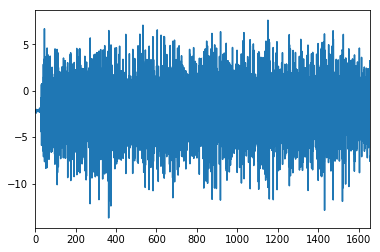

In [10]:
# 数据显示
sd1.data[1]['wave1'].plot()

## 数据导出

数据导出提供以下两个直接可以用的方法：

1. sd1.to_dat(s_seg = 'all') 默认导出所有段，或可导出指定段
2. sd1.to_mat(s_seg = 0) 这里请输入正整数，导出为包含该段所有信息的.mat文件

以上两种方法，生成的文件均保存在运行文件目录下。

除此之外，还可直接利用pandas函数导出特定段，特定通道数据，例如:

sd1.data[0]['F.line1'].to_csv('sd1.dat') # 导出第0段F.line1到*.dat文件

这种情况下，可以转存数据到TXT，EXCEL，HTML...

数据段信息也可导出或查看，提供以下直接可用的方法(可以打印到显示屏，TXT，EXCEL(下一版本会支持打印到粘贴版)):

1. sd1.pInfo(printTxt=False,printExcel=False) 打印段落信息
2. sd1.pChInfo(printTxt=False,printExcel=False)打印通道信息
3. sd1.pst(printTxt=False,printExcel=False)打印统计值信息


In [12]:
# 导出到*.dat
sd1.to_dat(s_seg = 0)

# 导出到*.mat
sd1.to_mat(s_seg = 0)

Export: /Users/xiaoxguo/OneDrive - sjtu.edu.cn/Python/SKLOEOUT/skloe_outfile/09221033_seg00.txt
Export: /Users/xiaoxguo/OneDrive - sjtu.edu.cn/Python/SKLOEOUT/skloe_outfile/09221033seg 0.mat


## 实型值数据转换

目前可以根据输入各个通道单位，实现实型值转换，步骤如下：

1. 请检查读取单位是否有误，原out文件单位仅能占4个字节，故超过四个字节单位要修复，如deg/s2，kg.cm等

    检查通道：sd1.pChInfo()
    
    检查是否已经转换：sd1.scale

2. 修复单位，请用以下方法：sd1.fix_unit(c_chN=['Ch36','Ch35'],unit=['kg.cm','kg.cm']) #修改36，37通道单位为kg.cm
    
3. 转换数据到实型值：sd1.to_fullscale()

注意，一经转换所有信息将变为实型值，以上提到的针对数据处理的方法均可用，通道转换可识别所有常用单位。

In [13]:
sd1.fix_unit(c_chN=['Ch36','Ch35'],unit=['kg.cm','kg.cm'])

/Users/xiaoxguo/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
sd1.to_fullscale()

Please make sure the channel units are all checked!
The data is upscaled.


In [15]:
sd1.pChInfo()

--------------------------------------------------
         Name     Unit  Coeffunit  Coeffrho  Coefflam
Ch01     F.line1    kN  0.009807      1.0       3.0  
Ch02     F.line2    kN  0.009807      1.0       3.0  
Ch03     F.line3    kN  0.009807      1.0       3.0  
Ch04     F.line4    kN  0.009807      1.0       3.0  
Ch05     F.line5    kN  0.009807      1.0       3.0  
Ch06     F.line6    kN  0.009807      1.0       3.0  
Ch07     F.line7    kN  0.009807      1.0       3.0  
Ch08     F.line8    kN  0.009807      1.0       3.0  
Ch09     F.line9    kN  0.009807      1.0       3.0  
Ch10    F.riser1    kN  0.009807      1.0       3.0  
Ch11    F.riser2    kN  0.009807      1.0       3.0  
Ch12    F.riser3    kN  0.009807      1.0       3.0  
Ch13    F.riser4    kN  0.009807      1.0       3.0  
Ch14    F.riser5    kN  0.009807      1.0       3.0  
Ch15    F.riser6    kN  0.009807      1.0       3.0  
Ch16    F.riser7    kN  0.009807      1.0       3.0  
Ch17    F.riser8    kN  0.00980